<a href="https://colab.research.google.com/github/trambak001/new/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Data loaded successfully from 'india_30cities_sample_metrics.csv' ---
--- Original Data ---
        City  Population (millions)  Population Density (per km2)  \
0     Mumbai                   8.12                          6890   
1      Delhi                  19.06                         11838   
2  Bangalore                  14.91                         17502   
3    Chennai                  12.37                         24777   
4    Kolkata                   3.96                         13627   

   Literacy Rate (%)  Per Capita Income (₹)  Average AQI  \
0               80.6                  92666          270   
1               75.2                 380804          280   
2               84.2                 214633           91   
3               70.8                 368998          135   
4               91.1                 184488          261   

   Cleanliness Score (Swachh)  
0                        6068  
1                        6864  
2                        2282  


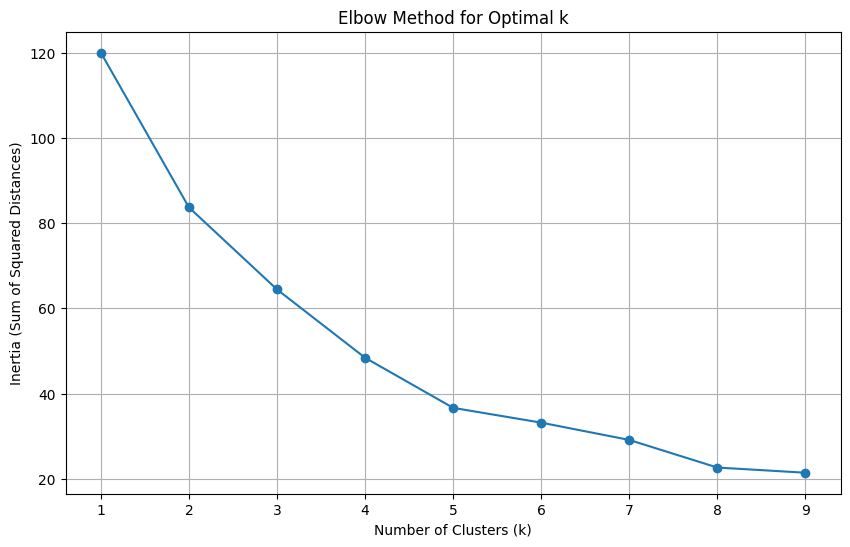

Optimal number of clusters selected: 4

--- Applying K-Means with k=4 ---
--- Final City Clusters ---

Cluster 0:
['Bangalore', 'Chennai', 'Kanpur', 'Visakhapatnam', 'Ghaziabad', 'Bhubaneswar']

Cluster 1:
['Mumbai', 'Delhi', 'Hyderabad', 'Ahmedabad', 'Chandigarh', 'Kochi', 'Mysuru']

Cluster 2:
['Kolkata', 'Pune', 'Surat', 'Nagpur', 'Indore', 'Thane', 'Pimpri-Chinchwad', 'Coimbatore', 'Rajkot', 'Thiruvananthapuram']

Cluster 3:
['Jaipur', 'Lucknow', 'Bhopal', 'Patna', 'Vadodara', 'Ludhiana', 'Agra']

--- Cluster Summary Statistics ---
         Population (millions)  Population Density (per km2)  \
Cluster                                                        
0                    12.346667                  21957.666667   
1                     8.352857                   8822.142857   
2                    10.117000                  20469.900000   
3                     6.608571                  18163.000000   

         Literacy Rate (%)  Per Capita Income (₹)  Average AQI  \
Cluster

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 1. Load Data ---
# The script now loads your data from 'india_30cities_sample_metrics.csv'.
# Make sure this file is in the same directory as this script.
try:
    df = pd.read_csv('india_30cities_sample_metrics.csv')
    print("--- Data loaded successfully from 'india_30cities_sample_metrics.csv' ---")
except FileNotFoundError:
    print("Error: 'india_30cities_sample_metrics.csv' not found.")
    # Exit the script or handle the error appropriately
    exit()

print("--- Original Data ---")
print(df.head())
print("\n")

# --- 2. Data Preprocessing ---
# Handle potential missing values, which can be crucial in real-world datasets.
print("--- Checking for missing values ---")
print(df.isnull().sum())
print("\n")

# Identify numerical columns for scaling and clustering.
# The script will drop the 'City' and 'Population (millions)' columns for clustering
# because they are either categorical or can skew the results without proper scaling.
# The metrics mentioned in the project plan are a mix of ratios, percentages and scores.
# These will be the focus of the clustering model.
cities = df['City']
df_features = df.drop(['City', 'Population (millions)', 'Per Capita Income (₹)'], axis=1)

# Feature Scaling
# Scaling the data is crucial for clustering algorithms like K-Means
# that are sensitive to the magnitude of features.
print("--- Scaling features ---")
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# --- 3. Determine Optimal Number of Clusters (Elbow Method) ---
# This method helps find a good value for k (the number of clusters)
# by plotting the sum of squared distances from each point to its assigned cluster center.
print("--- Determining optimal 'k' with the Elbow Method ---")
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Based on the plot, a good 'k' value will be where the elbow forms.
# Let's assume k=4 for this example, based on a typical elbow plot.
optimal_k = 4
print(f"Optimal number of clusters selected: {optimal_k}\n")

# --- 4. K-Means Clustering ---
# Apply the K-Means algorithm with the chosen number of clusters.
print(f"--- Applying K-Means with k={optimal_k} ---")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# --- 5. Results Interpretation ---
print("--- Final City Clusters ---")
for cluster_id in range(optimal_k):
    print(f"\nCluster {cluster_id}:")
    cluster_cities = df[df['Cluster'] == cluster_id]['City'].tolist()
    print(cluster_cities)

# Provide a statistical summary of the clusters
print("\n--- Cluster Summary Statistics ---")
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# You can now save the DataFrame with cluster labels to a new CSV file
df.to_csv('cities_with_clusters.csv', index=False)
print("\nDataFrame with clusters saved to 'cities_with_clusters.csv'")

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving india_30cities_sample_metrics.csv to india_30cities_sample_metrics.csv
User uploaded file "india_30cities_sample_metrics.csv" with length 1358 bytes
